In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load training dataset
train_csv_path = "ASL Landmarks Dataset/asl_landmarks_train.csv"
train_data = pd.read_csv(train_csv_path)

# Load testing dataset
test_csv_path = "ASL Landmarks Dataset/asl_landmarks_test.csv"
test_data = pd.read_csv(test_csv_path)

train_data

,class,landmark_0_x,landmark_0_y,landmark_1_x,landmark_1_y,landmark_2_x,landmark_2_y,landmark_3_x,landmark_3_y,landmark_4_x,...,landmark_16_x,landmark_16_y,landmark_17_x,landmark_17_y,landmark_18_x,landmark_18_y,landmark_19_x,landmark_19_y,landmark_20_x,landmark_20_y
0,0,0.0,0.0,0.099476,-0.078698,0.166424,-0.200537,0.194076,-0.315990,0.218975,...,-1.681456e-02,-0.123076,-0.078131,-0.243110,-0.105786,-0.282084,-0.093670,-0.213613,-0.070268,-0.162502
1,0,0.0,0.0,-0.070253,-0.053496,-0.101739,-0.150927,-0.102428,-0.235073,-0.103396,...,-7.437140e-03,-0.070589,0.103296,-0.209773,0.011828,-0.222170,0.006602,-0.155194,0.029539,-0.116828
2,0,0.0,0.0,0.102452,-0.060057,0.158706,-0.172422,0.172204,-0.264601,0.190224,...,8.322477e-03,-0.095210,-0.090776,-0.196799,-0.061433,-0.251963,-0.044816,-0.191246,-0.039917,-0.140749
3,0,0.0,0.0,-0.085347,-0.050611,-0.132619,-0.149670,-0.140852,-0.229155,-0.153681,...,6.556511e-07,-0.092924,0.085546,-0.187098,0.055763,-0.229951,0.038748,-0.174257,0.038011,-0.133269
4,0,0.0,0.0,0.086615,-0.051542,0.141406,-0.151304,0.155833,-0.240466,0.179223,...,-4.869282e-03,-0.084323,-0.070753,-0.180255,-0.072548,-0.221352,-0.061867,-0.167265,-0.050089,-0.126513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28995,28,0.0,0.0,0.024880,-0.072885,0.000279,-0.126806,-0.025158,-0.166387,-0.043565,...,-3.209115e-01,-0.152691,-0.212245,-0.051876,-0.291132,-0.048634,-0.323496,-0.084852,-0.334329,-0.120141
28996,28,0.0,0.0,0.018801,-0.070597,-0.004504,-0.120139,-0.029173,-0.159544,-0.047209,...,-3.181977e-01,-0.143557,-0.212408,-0.037370,-0.289822,-0.035340,-0.321726,-0.069880,-0.332589,-0.104547
28997,28,0.0,0.0,0.019763,-0.068074,-0.006346,-0.117769,-0.029318,-0.159786,-0.047912,...,-3.193333e-01,-0.139151,-0.212414,-0.036123,-0.290955,-0.027441,-0.321899,-0.061462,-0.330328,-0.097345
28998,28,0.0,0.0,0.025689,-0.066219,0.005693,-0.116563,-0.020731,-0.159576,-0.041822,...,-3.094470e-01,-0.134814,-0.195039,-0.038482,-0.263532,-0.044471,-0.290372,-0.081999,-0.296448,-0.117755


In [4]:
from sklearn.model_selection import train_test_split

# Separate the labels (first column) and the landmarks (remaining columns)
X_train = train_data.drop(columns=['class'])  # All columns except 'label'
y_train = train_data['class']  # Only the 'label' column

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)


X_test = test_data.drop(columns=['class'])
y_test = test_data['class']

In [5]:
# Convert labels to one-hot encoding
num_classes = 29  # A-Z (29 classes)
y_train = np.eye(num_classes)[y_train.astype(int)]
y_val = np.eye(num_classes)[y_val.astype(int)]
y_test = np.eye(num_classes)[y_test.astype(int)]

# Verify shapes
print("Training Data Shapes:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")

print("\nValidation Data Shapes:")
print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")

print("\nTesting Data Shapes:")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

Training Data Shapes:
X_train: (24650, 42), y_train: (24650, 29)

Validation Data Shapes:
X_val: (4350, 42), y_val: (4350, 29)

Testing Data Shapes:
X_test: (8700, 42), y_test: (8700, 29)


In [6]:
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Input layer (number of features = 42)
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')  # Output layer (26 classes)
])

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               5504      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 29)                1885      
                                                                 
Total params: 15,645
Trainable params: 15,645
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,  # Number of training epochs
    batch_size=32,  # Batch size
    validation_data=(X_val, y_val)  # Validation data
)

Epoch 1/50
771/771 [==============================] - 2s 2ms/step - loss: 1.9510 - accuracy: 0.3865 - val_loss: 0.8715 - val_accuracy: 0.7759
Epoch 2/50
771/771 [==============================] - 1s 1ms/step - loss: 0.9009 - accuracy: 0.6890 - val_loss: 0.5031 - val_accuracy: 0.8862
Epoch 3/50
771/771 [==============================] - 1s 1ms/step - loss: 0.6489 - accuracy: 0.7778 - val_loss: 0.3693 - val_accuracy: 0.9108
Epoch 4/50
771/771 [==============================] - 1s 1ms/step - loss: 0.5316 - accuracy: 0.8249 - val_loss: 0.2978 - val_accuracy: 0.9313
Epoch 5/50
771/771 [==============================] - 1s 1ms/step - loss: 0.4575 - accuracy: 0.8500 - val_loss: 0.2507 - val_accuracy: 0.9421
Epoch 6/50
771/771 [==============================] - 1s 1ms/step - loss: 0.4064 - accuracy: 0.8692 - val_loss: 0.2324 - val_accuracy: 0.9439
Epoch 7/50
771/771 [==============================] - 1s 2ms/step - loss: 0.3670 - accuracy: 0.8838 - val_loss: 0.1935 - val_accuracy: 0.9538
Epoch 

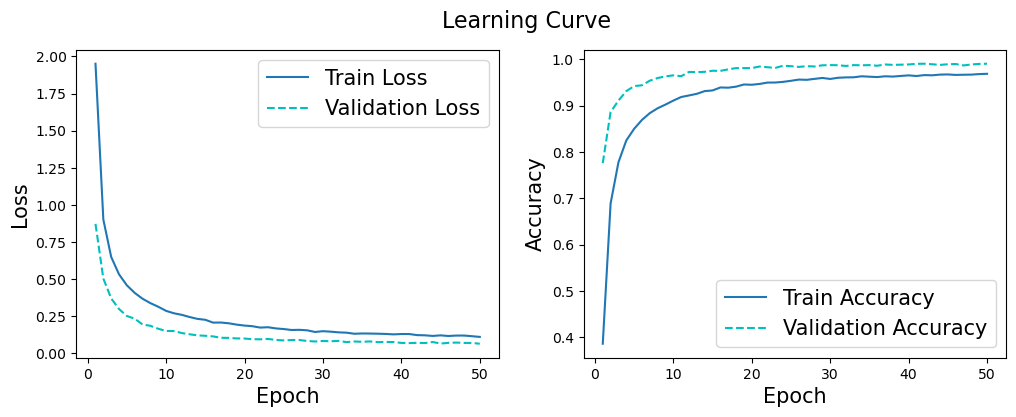

In [8]:
hist = history.history
x_arr = np.arange(len(hist['loss']))+1
fig = plt.figure(figsize=(12,4))
fig.suptitle('Learning Curve', fontsize=16)
ax = fig.add_subplot(1,2,1)
ax.plot(x_arr,hist['loss'], '-', label='Train Loss')
ax.plot(x_arr,hist['val_loss'],'--c',label='Validation Loss')
ax.set_xlabel('Epoch',size=15)
ax.set_ylabel('Loss',size=15)
ax.legend(fontsize=15)
ax = fig.add_subplot(1,2,2)
ax.plot(x_arr,hist['accuracy'], '-' , label='Train Accuracy')
ax.plot(x_arr,hist['val_accuracy'],'--c',label='Validation Accuracy')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch',size=15)
ax.set_ylabel('Accuracy',size=15)
plt.show()

272/272 [==============================] - 0s 782us/step
Confusion Matrix:


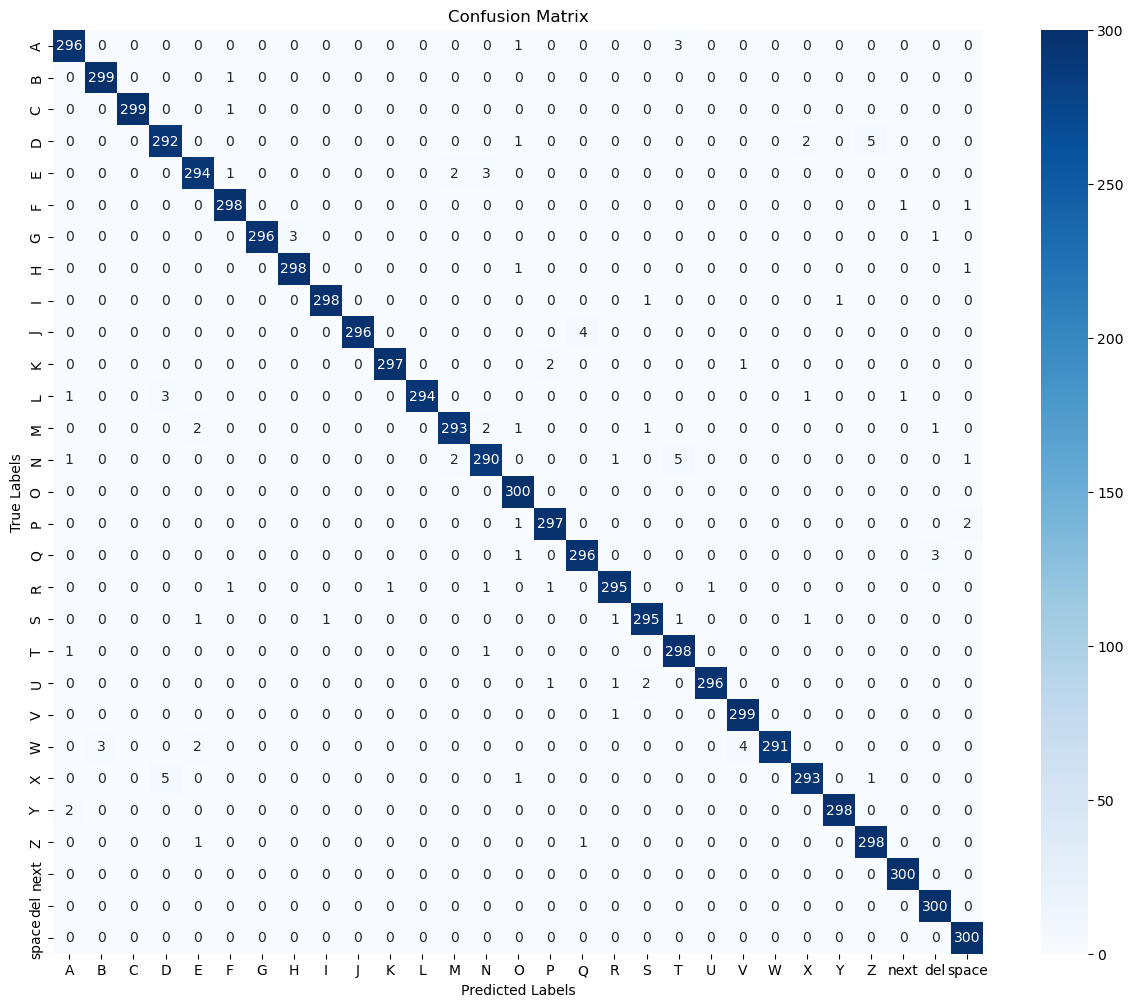

Classification Report:
              precision    recall  f1-score   support

           A       0.98      0.99      0.99       300
           B       0.99      1.00      0.99       300
           C       1.00      1.00      1.00       300
           D       0.97      0.97      0.97       300
           E       0.98      0.98      0.98       300
           F       0.99      0.99      0.99       300
           G       1.00      0.99      0.99       300
           H       0.99      0.99      0.99       300
           I       1.00      0.99      0.99       300
           J       1.00      0.99      0.99       300
           K       1.00      0.99      0.99       300
           L       1.00      0.98      0.99       300
           M       0.99      0.98      0.98       300
           N       0.98      0.97      0.97       300
           O       0.98      1.00      0.99       300
           P       0.99      0.99      0.99       300
           Q       0.98      0.99      0.99       300
    

In [9]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  # Make sure you import numpy

# Define class names including the new classes
class_names = [chr(i) for i in range(ord('A'), ord('Z') + 1)] + ['next', 'del', 'space']

# Make predictions on the testing data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")

# Visualize the confusion matrix with class names
plt.figure(figsize=(15, 12))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Generate the classification report with class names
class_report = classification_report(y_true_classes, y_pred_classes, target_names=class_names)
print("Classification Report:")
print(class_report)


In [11]:
# Save the model
model.save('ASL_classification.h5')